# Estratégia de Médias Móveis

O foco desse estudo é o de realizar o backtesting utilizando as ações da Alpargatas (ALPA4) de uma estratégia baseada em médias móveis.

In [ ]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [153]:
import requests
import pandas as pd
import numpy as np
from io import StringIO

url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=ALPA4.SA&apikey=F3N5MR6RBA5TWYN9&datatype=csv&outputsize=full'
r = requests.get(url)

csv_file = StringIO(r.text)  # transforma a resposta do request em um arquivo csv

df = pd.read_csv(csv_file, index_col=0, parse_dates=True)  # lendo csv com pandas
df.rename_axis('Data', inplace=True)  # alterando nome da coluna índice

precos = pd.DataFrame()
precos['Close'] = df['adjusted_close'][::-1]  # criando novo DataFrame com coluna de interesse

In [154]:
precos['SMA1'] = precos['Close'].rolling(40).mean()   # incluindo coluna com a média dos últimos 40 dias
precos['SMA2'] = precos['Close'].rolling(250).mean()  # incluindo coluna com a média dos últimos 250 dias

precos

,Close,SMA1,SMA2
Data,,,
2005-01-03,7.6718,NaN,NaN
2005-01-04,7.5206,NaN,NaN
2005-01-05,7.3476,NaN,NaN
2005-01-06,7.3476,NaN,NaN
2005-01-07,7.4125,NaN,NaN
...,...,...,...
2023-06-09,10.9400,8.91975,15.16772
2023-06-12,10.9600,9.00400,15.13764
2023-06-13,10.4200,9.07800,15.10480


<Axes: xlabel='Data'>

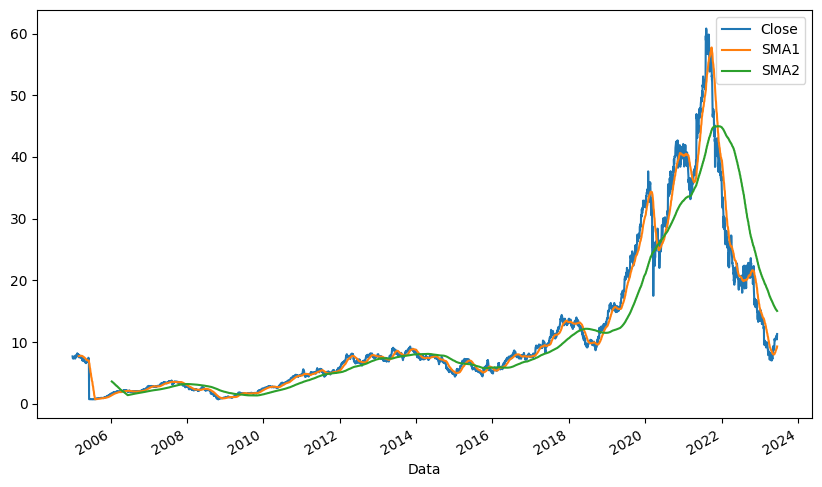

In [155]:
precos[['Close','SMA1', 'SMA2']].plot(figsize=(10, 6))  # plotando o histórico dos preços e das médias

<Axes: xlabel='Data'>

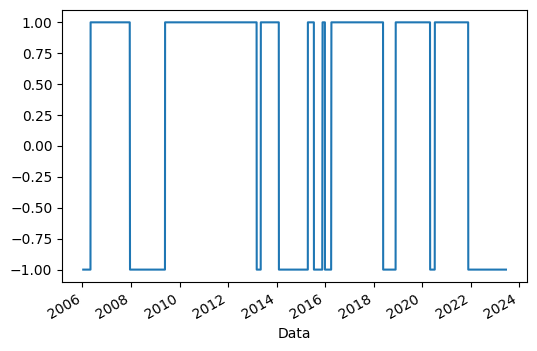

In [156]:
precos['Posicao'] = np.where(precos['SMA1'] > precos['SMA2'], 1, -1)  # definindo critério de entrada

precos.dropna(inplace = True)  # retirando linhas com NaN

precos['Posicao'].plot(ylim=[-1.1, 1.1], figsize=(6, 4))  # plotando a posição da carteira ao longo do tempo

<Axes: >

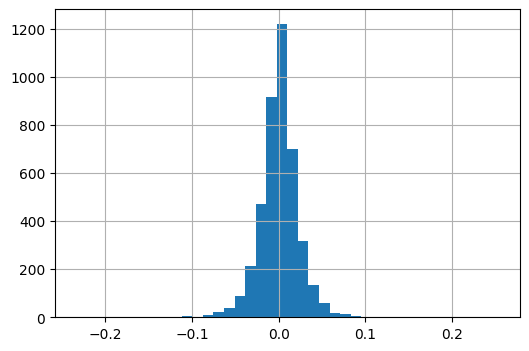

In [157]:
precos['Retornos'] = np.log(precos['Close']/precos['Close'].shift(1))  # calculando log retornos da ação

precos['Retornos'].hist(bins=40, figsize = (6, 4))  # distribuição normal dos log retornos

<Axes: xlabel='Data'>

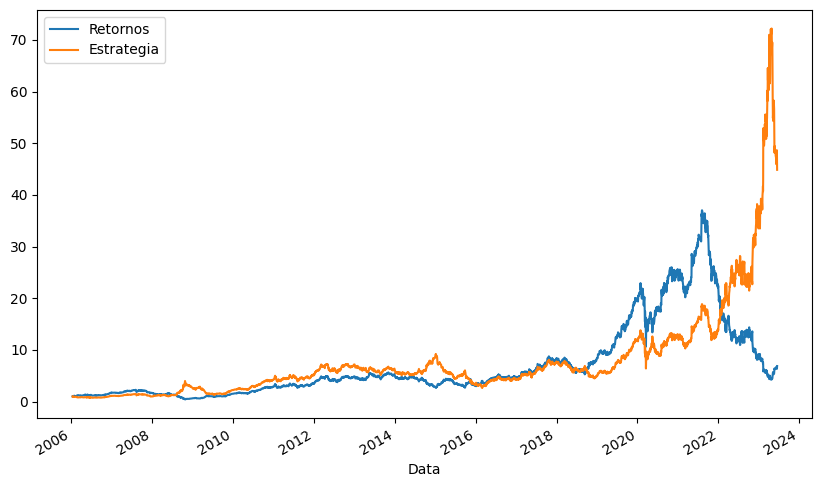

In [158]:
precos['Estrategia'] = precos['Posicao'].shift(1) * precos['Retornos']   # calculando os retornos da estratégia

precos[['Retornos', 'Estrategia']].cumsum().apply(np.exp).plot(figsize=(10, 6))

In [159]:
# Calculando retornos médios anualizados

retorno_acao = np.exp(precos['Retornos'].mean() * 252) - 1
retorno_estrategia = np.exp(precos['Estrategia'].mean() * 252) - 1

print('Retorno médio anualizado da ação: ',  "{:.2f}%".format(retorno_acao*100))
print('Retornos médio anualizado da estratégia: ', "{:.2f}%".format(retorno_estrategia*100))

Retorno médio anualizado da ação:  12.08%
Retornos médio anualizado da estratégia:  25.21%


In [160]:
# Calculando desvios padrão anualizados

std_acao = (np.exp(precos['Retornos']) - 1).std() * 252 ** 0.5
std_estrategia = (np.exp(precos['Estrategia']) - 1).std() * 252 ** 0.5

print('Desvio padrão anualizado da ação: ',  "{:.2f}%".format(std_acao*100))
print('Desvio padrão anualizado da estratégia: ', "{:.2f}%".format(std_estrategia*100))

Desvio padrão anualizado da ação:  39.07%
Desvio padrão anualizado da estratégia:  39.52%
